In [2]:
import tensorflow as tf
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
(train_data, train_labels), (test_data, test_labels) = tf.keras.datasets.boston_housing.load_data()

In [4]:
data_mean = train_data.mean(axis=0)
train_data -= data_mean
std_train_data = train_data.std(axis=0)

test_data -= data_mean
test_data /= std_train_data

In [5]:
def build_neural_model():

    model = tf.keras.Sequential()
    model.add(tf.keras.layers.Dense(64, activation="relu", input_shape=(train_data.shape[1], )))
    model.add(tf.keras.layers.Dense(64, activation="relu"))
    model.add(tf.keras.layers.Dense(1))

    model.compile(optimizer="rmsprop",
                  loss="mse",
                  metrics=["mae"])
    
    return model

In [6]:
k_blocks = 3
num_val_samples = len(train_data) // k_blocks
num_epochs = 100
all_scores = []

for block in range(k_blocks):

    val_data = train_data[block * num_val_samples:(block + 1) * num_val_samples]
    val_labels = train_labels[block * num_val_samples:(block + 1) * num_val_samples]
    
    partial_train_data = np.concatenate([
        train_data[:block * num_val_samples],
        train_data[(block + 1) * num_val_samples:]
    ], axis=0)
    partial_train_labels = np.concatenate([
        train_labels[:block * num_val_samples],
        train_labels[(block + 1) * num_val_samples:]
    ], axis=0)

    model = build_neural_model()
    history = model.fit(partial_train_data, partial_train_labels,
            validation_data=(val_data, val_labels),
            epochs=num_epochs, batch_size=1, verbose=0)
    
    mae_history = history.history["val_mae"]
    all_scores.append(mae_history)

print(all_scores)

[[6.2547760009765625, 5.283417701721191, 5.416597366333008, 5.07522439956665, 4.77044153213501, 4.6976470947265625, 5.377372741699219, 6.552516460418701, 6.099190711975098, 5.269394874572754, 3.7747604846954346, 4.019916534423828, 4.860037803649902, 4.155380725860596, 3.4390838146209717, 4.071468353271484, 4.464555263519287, 5.3415117263793945, 4.630797386169434, 4.966796398162842, 4.053029537200928, 3.6084444522857666, 4.101241588592529, 3.180124044418335, 3.269277811050415, 4.044092655181885, 2.8879923820495605, 4.18473482131958, 2.88580584526062, 3.5080771446228027, 3.2426769733428955, 4.319666385650635, 3.5977563858032227, 2.8944497108459473, 2.975677967071533, 3.6158931255340576, 3.027305841445923, 3.7190988063812256, 3.5284523963928223, 3.1541025638580322, 3.2240407466888428, 3.5718002319335938, 3.262498140335083, 3.1716983318328857, 2.956787109375, 4.171499729156494, 2.7145891189575195, 3.461163282394409, 2.8280699253082275, 2.896049737930298, 3.0297255516052246, 2.6409418582916

3


C:\Users\1\AppData\Local\Temp\ipykernel_8324\1530705204.py:1: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use("seaborn")


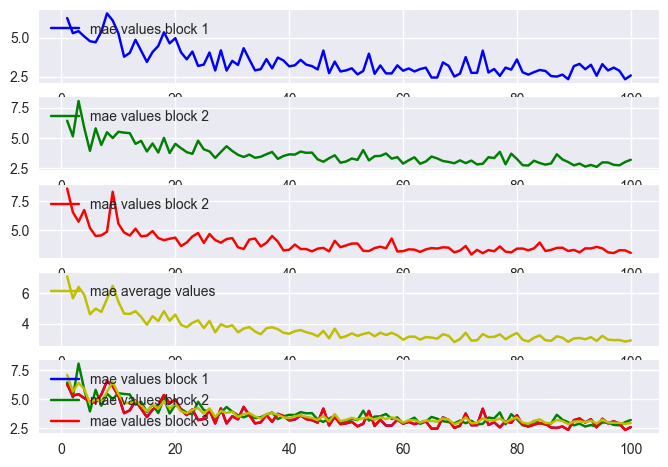

In [7]:
plt.style.use("seaborn")
figure, axis = plt.subplots(nrows=5)

average_mae_history = [np.mean([x[i] for x in all_scores]) for i in range(num_epochs)]
print(len(all_scores))

axis[0].plot(range(1, len(all_scores[0]) + 1), np.asarray(all_scores[0]), color="blue", label="mae values block 1")
axis[0].fill_between(range(1, len(all_scores[0]) + 1), np.asarray(all_scores[0]) - 0.012, np.asarray(all_scores[0]) + 0.02, color="gray", alpha=0.4)
axis[1].plot(range(1, len(all_scores[1]) + 1), all_scores[1], color="green", label="mae values block 2")
axis[1].fill_between(range(1, len(all_scores[1]) + 1), np.asarray(all_scores[1]) - 0.02, np.asarray(all_scores[1]) + 0.02, color="gray", alpha=0.4)
axis[2].plot(range(1, len(all_scores[2]) + 1), all_scores[2], color="red", label="mae values block 2")
axis[2].fill_between(range(1, len(all_scores[2]) + 1), np.asarray(all_scores[2]) - 0.02, np.asarray(all_scores[2]) + 0.02, color="gray", alpha=0.4)
axis[3].plot(range(1, len(all_scores[0]) + 1), average_mae_history, color="y", label="mae average values")
axis[3].fill_between(range(1, len(average_mae_history) + 1), np.asarray(average_mae_history) - 0.02, np.asarray(average_mae_history) + 0.02, color="gray", alpha=0.4)
axis[4].plot(range(1, len(all_scores[0]) + 1), all_scores[0], color="blue", label="mae values block 1")
axis[4].plot(range(1, len(all_scores[1]) + 1), all_scores[1], color="green", label="mae values block 2")
axis[4].plot(range(1, len(all_scores[0]) + 1), all_scores[0], color="red", label="mae values block 3")
axis[4].plot(range(1, len(all_scores[0]) + 1), average_mae_history, color="y", label="")

axis[0].legend(loc="upper left")
axis[1].legend(loc="upper left")
axis[2].legend(loc="upper left")
axis[3].legend(loc="upper left")
axis[4].legend(loc="upper left")

plt.show()

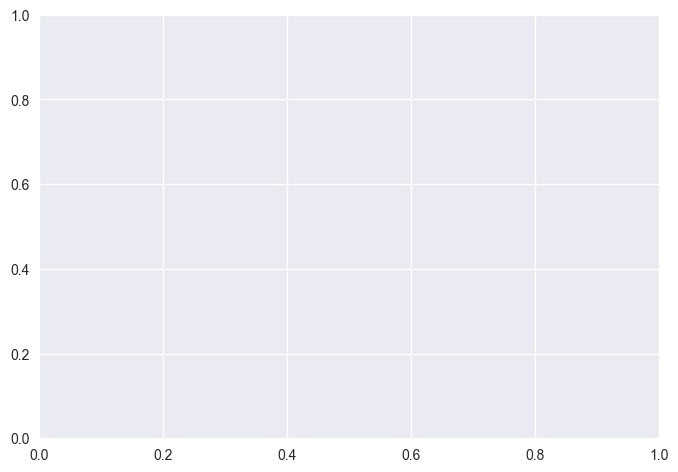

In [10]:
k_blocks_1 = 4
num_of_samples = len(train_data) // k_blocks_1
figure_1, axis_1 = plt.subplots()

validation_scores = []
for block_i in range(k_blocks_1):

    partial_train_data_1 = train_data[block_i * num_of_samples:(block_i + 1) * num_of_samples]
    partial_train_labels_1 = train_labels[block_i * num_of_samples:(block_i + 1) * num_of_samples]

    history = model.fit(partial_train_data_1, partial_train_labels_1,
                        verbose=0, batch_size=1, epochs=300)
    
    validation_scores.append(history.history["mae"])









(300,)


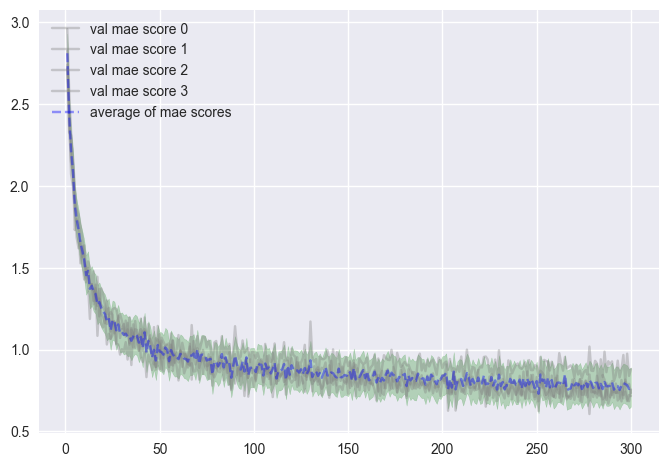

In [27]:
figure_1, axis_1 = plt.subplots()
color_palet = ["blue", "green", "red", "y"]
for scores in range(len(validation_scores)):
    axis_1.plot(range(1, len(validation_scores[scores]) + 1), validation_scores[scores], color="gray", label=f"val mae score {scores}", alpha=0.36)
math_mean = np.mean(np.array(validation_scores), axis=0)
print(math_mean.shape)
axis_1.plot(range(1, len(validation_scores[0]) + 1), np.mean(np.array(validation_scores), axis=0), color="blue", linestyle="--", alpha=0.4, label="average of mae scores")
axis_1.fill_between(range(1, len(validation_scores[0]) + 1), np.mean(np.array(validation_scores), axis=0) - 0.12, np.mean(np.array(validation_scores), axis=0) + 0.12, color="green", alpha=0.239999999)

axis_1.legend(loc="upper left")
plt.show()

4/4 [==============================] - 0s 1ms/step
(102,) (102,)
(102,)


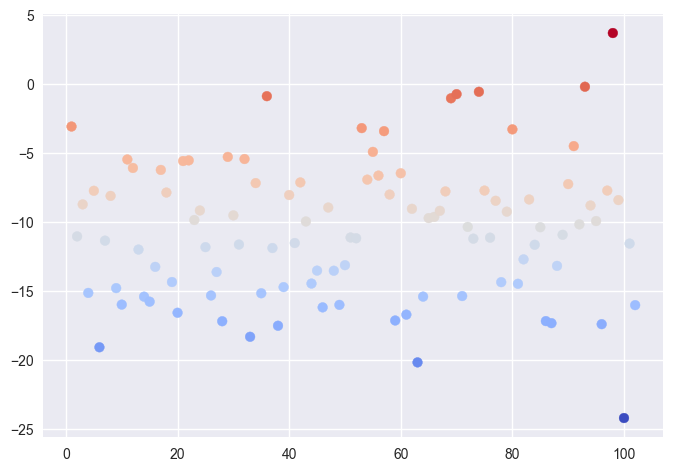

In [41]:
prediction = model.predict(test_data)
prediction = np.asarray([x[0] for x in prediction])
fig, axis_2 = plt.subplots()

prediction_loss = prediction - test_labels
print(prediction.shape, test_labels.shape)
print(prediction_loss.shape)
axis_2.scatter(range(1, prediction_loss.shape[0] + 1), prediction_loss, cmap="coolwarm", c=prediction_loss)
plt.show()
